# Steps Involved to predict customer Churn
>#### Importing Libraries
>#### Loading Dataset
>#### Exploratory Data Analysis
>#### Basic Data Cleaning
>#### Exploring All Categorical Columns
>#### Exploring all Numerical Columns
>#### Multitable Analysis
>#### Outliers using IQR method
>#### Data Cleaning
>#### One-hot Encoding
>#### Rearranging Columns
>### Prediction using
>#### KNN classifier
>#### Random Forest Classifier
>#### Logistic Regression
>#### Support Vector Classifier
>#### Decision Tree Classifier
>#### GridSearchCV (Hyper Parameter Tuning)
>#### ADA Boost Classifier
>#### Gradient Boosting Classifier
>#### Stochastic Gradient Boosting (SGB)
>#### Cat Boost Classifier
>#### XGB Boost Classifier

># Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


># Loading Dataset

In [3]:
df = pd.read_csv("C:\\Users\\Dell\\Desktop\\MS984\\Company A - Data.csv")
df

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  \
0           1869  7010-BRBUU    Male              0     Yes        Yes   
1           4528  9688-YGXVR  Female              0      No         No   
2           6344  9286-DOJGF  Female              1     Yes         No   
3           6739  6994-KERXL    Male              0      No         No   
4            432  2181-UAESM    Male              0      No         No   
...          ...         ...     ...            ...     ...        ...   
5981        3772  0684-AOSIH    Male              0     Yes         No   
5982        5191  5982-PSMKW  Female              0     Yes        Yes   
5983        5226  8044-BGWPI    Male              0     Yes        Yes   
5984        5390  7450-NWRTR    Male              1      No         No   
5985         860  4795-UXVCJ    Male              0      No         No   

      tenure PhoneService MultipleLines InternetService  ...  \
0         72          Yes           Yes              No  ...   
1         44          Yes            No     Fiber optic  ...   
2         38          Yes           Yes     Fiber optic  ...   
3          4          Yes            No             DSL  ...   
4          2          Yes            No             DSL  ...   
...      ...          ...           ...             ...  ...   
5981       1          Yes            No     Fiber optic  ...   
5982      23          Yes           Yes             DSL  ...   
5983      12          Yes            No              No  ...   
5984      12          Yes           Yes     Fiber optic  ...   
5985      26          Yes            No              No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
0     No internet service  No internet service  No internet service   
1                     Yes                   No                  Yes   
2                      No                   No                   No   
3                      No                   No                   No   
4                     Yes                   No                   No   
...                   ...                  ...                  ...   
5981                   No                   No                  Yes   
5982                  Yes                  Yes                  Yes   
5983  No internet service  No internet service  No internet service   
5984                  Yes                   No                  Yes   
5985  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
0     No internet service        Two year               No   
1                      No  Month-to-month              Yes   
2                      No  Month-to-month              Yes   
3                     Yes  Month-to-month              Yes   
4                      No  Month-to-month               No   
...                   ...             ...              ...   
5981                  Yes  Month-to-month              Yes   
5982                  Yes        Two year              Yes   
5983  No internet service  Month-to-month              Yes   
5984                  Yes  Month-to-month              Yes   
5985  No internet service        One year               No   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  
0       Credit card (automatic)          24.10      1734.65     No  
1       Credit card (automatic)          88.15       3973.2     No  
2     Bank transfer (automatic)          74.95      2869.85    Yes  
3              Electronic check          55.90        238.5     No  
4              Electronic check          53.45        119.5     No  
...                         ...            ...          ...    ...  
5981           Electronic check          95.00           95    Yes  
5982    Credit card (automatic)          91.10       2198.3     No  
5983           Electronic check          21.15       306.05     No  
5984           Electronic check          99.45      1200.15 

># Exploratory Data Analysis

In [4]:
df.head()

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female              1     Yes         No      38   
3        6739  6994-KERXL    Male              0      No         No       4   
4         432  2181-UAESM    Male              0      No         No       2   

  PhoneService MultipleLines InternetService  ...     DeviceProtection  \
0          Yes           Yes              No  ...  No internet service   
1          Yes            No     Fiber optic  ...                  Yes   
2          Yes           Yes     Fiber optic  ...                   No   
3          Yes            No             DSL  ...                   No   
4          Yes            No             DSL  ...                  Yes   

           TechSupport          StreamingTV      StreamingMovies  \
0  No internet service  No internet service  No internet service   
1                   No                  Yes                   No   
2                   No                   No                   No   
3                   No                   No                  Yes   
4                   No                   No                   No   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0        Two year               No    Credit card (automatic)          24.10   
1  Month-to-month              Yes    Credit card (automatic)          88.15   
2  Month-to-month              Yes  Bank transfer (automatic)          74.95   
3  Month-to-month              Yes           Electronic check          55.90   
4  Month-to-month               No           Electronic check          53.45   

  TotalCharges  Churn  
0      1734.65     No  
1       3973.2     No  
2      2869.85    Yes  
3        238.5     No  
4        119.5     No  

[5 rows x 22 columns]

In [5]:
df.tail()

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  \
5981        3772  0684-AOSIH    Male              0     Yes         No   
5982        5191  5982-PSMKW  Female              0     Yes        Yes   
5983        5226  8044-BGWPI    Male              0     Yes        Yes   
5984        5390  7450-NWRTR    Male              1      No         No   
5985         860  4795-UXVCJ    Male              0      No         No   

      tenure PhoneService MultipleLines InternetService  ...  \
5981       1          Yes            No     Fiber optic  ...   
5982      23          Yes           Yes             DSL  ...   
5983      12          Yes            No              No  ...   
5984      12          Yes           Yes     Fiber optic  ...   
5985      26          Yes            No              No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
5981                   No                   No                  Yes   
5982                  Yes                  Yes                  Yes   
5983  No internet service  No internet service  No internet service   
5984                  Yes                   No                  Yes   
5985  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
5981                  Yes  Month-to-month              Yes   
5982                  Yes        Two year              Yes   
5983  No internet service  Month-to-month              Yes   
5984                  Yes  Month-to-month              Yes   
5985  No internet service        One year               No   

                PaymentMethod MonthlyCharges TotalCharges  Churn  
5981         Electronic check          95.00           95    Yes  
5982  Credit card (automatic)          91.10       2198.3     No  
5983         Electronic check          21.15       306.05     No  
5984         Electronic check          99.45      1200.15    Yes  
5985  Credit card (automatic)          19.80        457.3     No  

[5 rows x 22 columns]

In [6]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [8]:
df.shape

(5986, 22)

In [9]:
df.size

131692

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [11]:
df.describe()

Unnamed: 0  SeniorCitizen       tenure  MonthlyCharges
count  5986.000000    5986.000000  5986.000000     5986.000000
mean   3533.561310       0.161377    32.468760       64.802213
std    2035.705666       0.367909    24.516391       30.114702
min       0.000000       0.000000     0.000000       18.250000
25%    1777.250000       0.000000     9.000000       35.650000
50%    3546.500000       0.000000    29.000000       70.400000
75%    5291.750000       0.000000    56.000000       89.900000
max    7042.000000       1.000000    72.000000      118.750000

In [12]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.skew()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0       -0.004293
SeniorCitizen     1.841417
tenure            0.233822
MonthlyCharges   -0.218678
dtype: float64

In [15]:
df.corr()

Unnamed: 0  SeniorCitizen    tenure  MonthlyCharges
Unnamed: 0        1.000000      -0.000331  0.009620       -0.009830
SeniorCitizen    -0.000331       1.000000  0.005468        0.219387
tenure            0.009620       0.005468  1.000000        0.256983
MonthlyCharges   -0.009830       0.219387  0.256983        1.000000

># Basic Data Cleaning

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

#### Totalcharges is given as object datatype but it is float datatype

># Exploring all Categorical Columns

In [17]:
df['gender'].value_counts()

Male      3050
Female    2936
Name: gender, dtype: int64

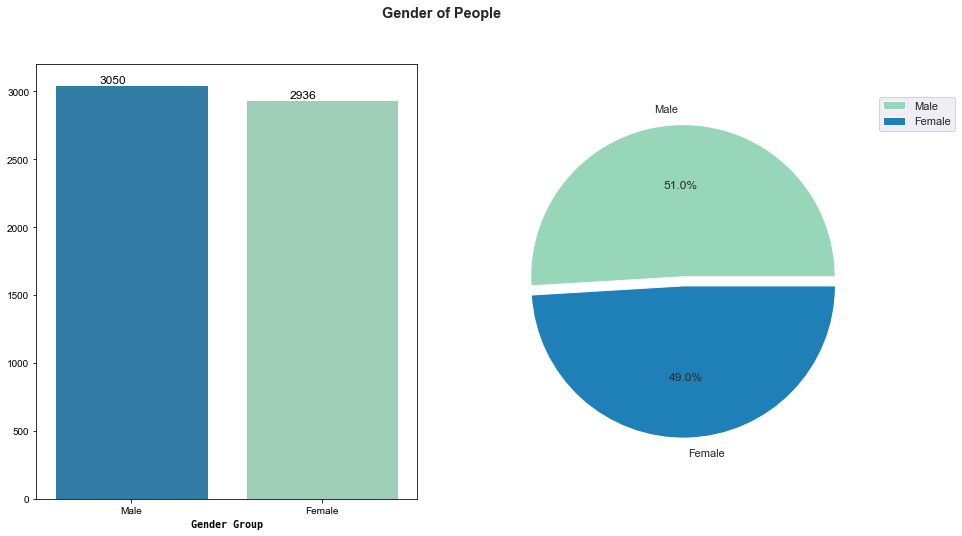

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['gender'].value_counts().index
y=df['gender'].value_counts().values.tolist()
data = df.groupby("gender").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Gender Group', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['gender'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Gender of People',weight = 'bold')
plt.show()

>#### We can clearly see here that male customers are more than female customres but not with big difference. In terms of numbers **67** male customers are more and in percentage **0.5%** male customers are more .

In [19]:
df['SeniorCitizen'].value_counts()

0    5020
1     966
Name: SeniorCitizen, dtype: int64

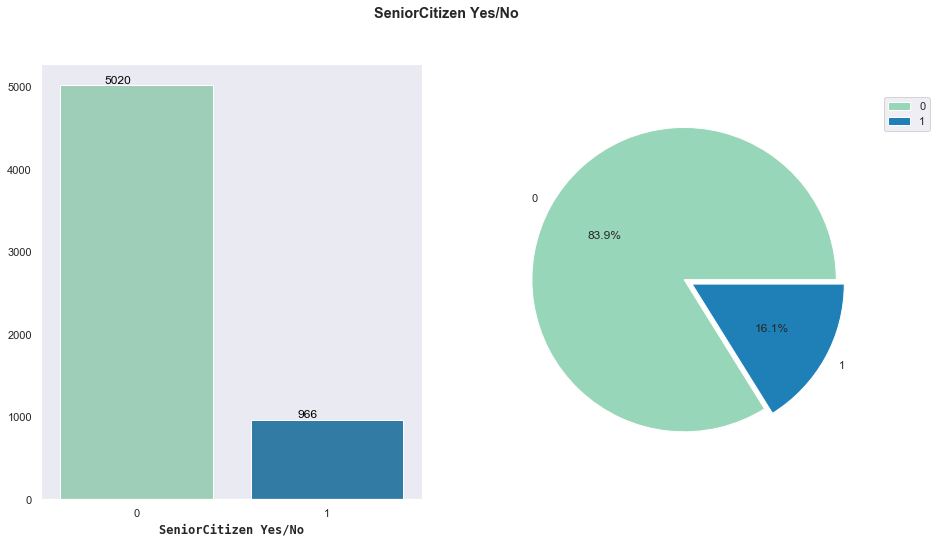

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['SeniorCitizen'].value_counts().index
y=df['SeniorCitizen'].value_counts().values.tolist()
data = df.groupby("SeniorCitizen").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('SeniorCitizen Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['SeniorCitizen'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('SeniorCitizen Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are not SeniorCitizen.
>#### Number of customers without partners are 5901, 83.8% of the customers are not SeniorCitizen.
>#### Number of customers with partners are 1142, 16.2% of the customers are SeniorCitizen.

In [21]:
df['Partner'].value_counts()

No     3082
Yes    2904
Name: Partner, dtype: int64

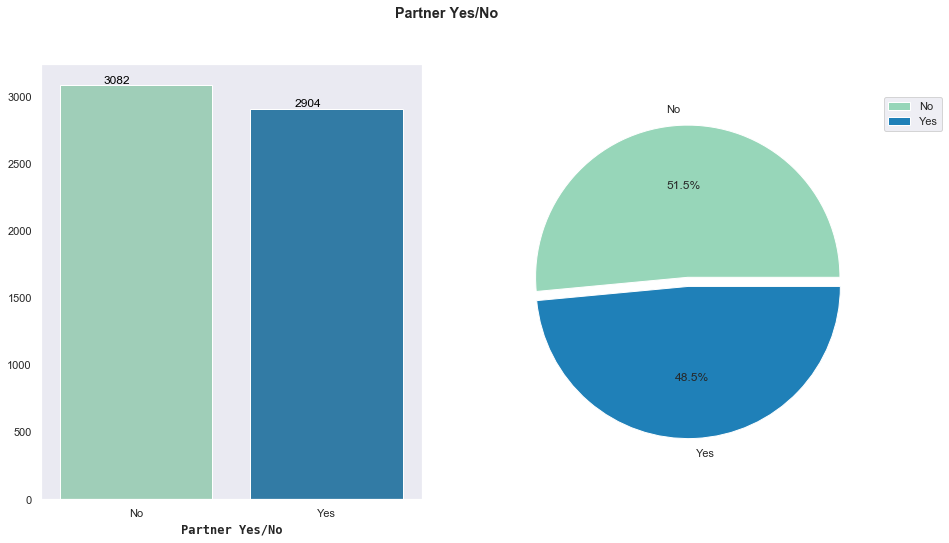

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Partner'].value_counts().index
y=df['Partner'].value_counts().values.tolist()
data = df.groupby("Partner").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Partner Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Partner'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Partner Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are not having partners.
>#### Number of customers without partners are 3641, 51.7% of the customers are not having partners
>#### Number of customers with partners are 3402, 48.3% of the customers are not having partners.

In [23]:
df['Dependents'].value_counts()

No     4195
Yes    1791
Name: Dependents, dtype: int64

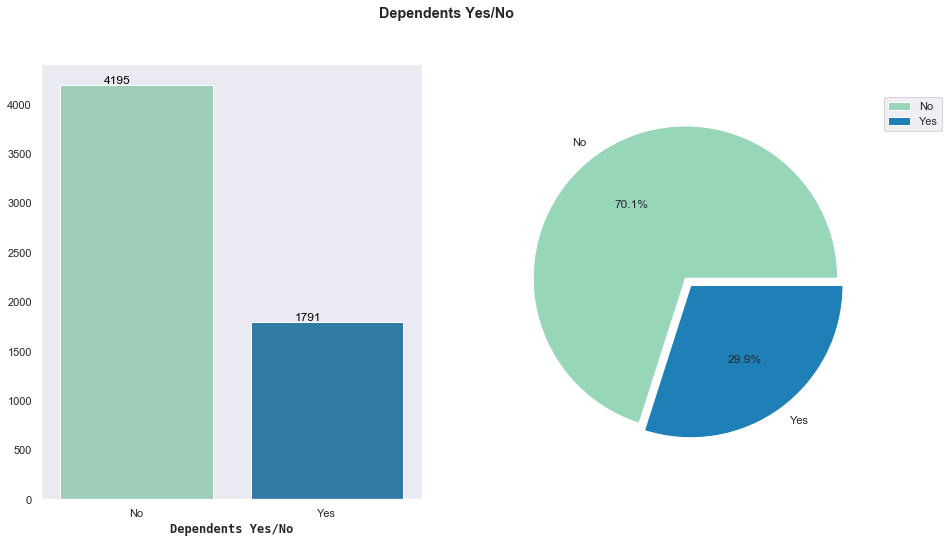

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Dependents'].value_counts().index
y=df['Dependents'].value_counts().values.tolist()
data = df.groupby("Dependents").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Dependents Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Dependents'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Dependents Yes/No',weight = 'bold')
plt.show()

>#### Most of the people are not having dependents for them
>#### 70.0% (4933) of customers are not having dependents
>#### 30.0% (2110) of customers are having dependents

In [25]:
df['PhoneService'].value_counts()

Yes    5396
No      590
Name: PhoneService, dtype: int64

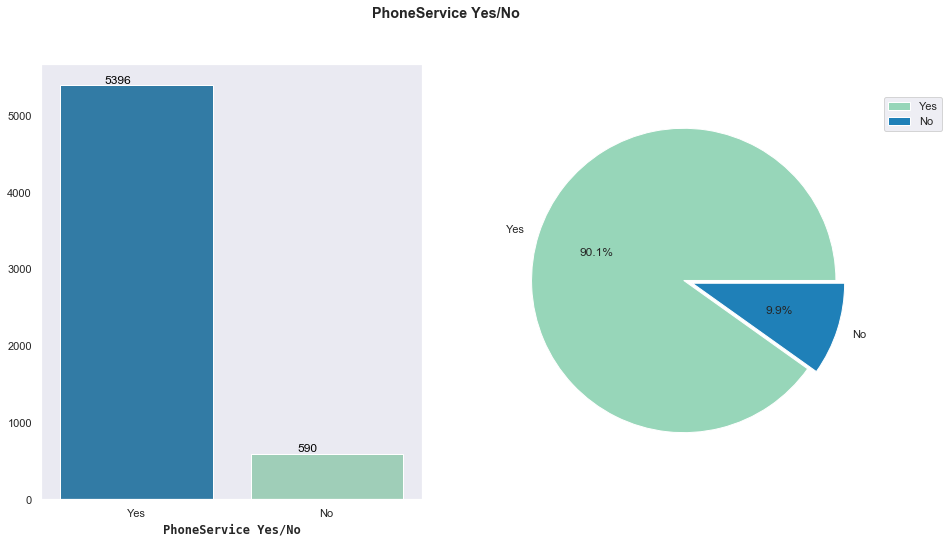

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['PhoneService'].value_counts().index
y=df['PhoneService'].value_counts().values.tolist()
data = df.groupby("PhoneService").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('PhoneService Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['PhoneService'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('PhoneService Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are having phone services
>#### 90.3% (6361) of the customers are having phone services
>#### 9.7% (682) of the customers are not having phone services

In [27]:
df['MultipleLines'].value_counts()

No                  2848
Yes                 2548
No phone service     590
Name: MultipleLines, dtype: int64

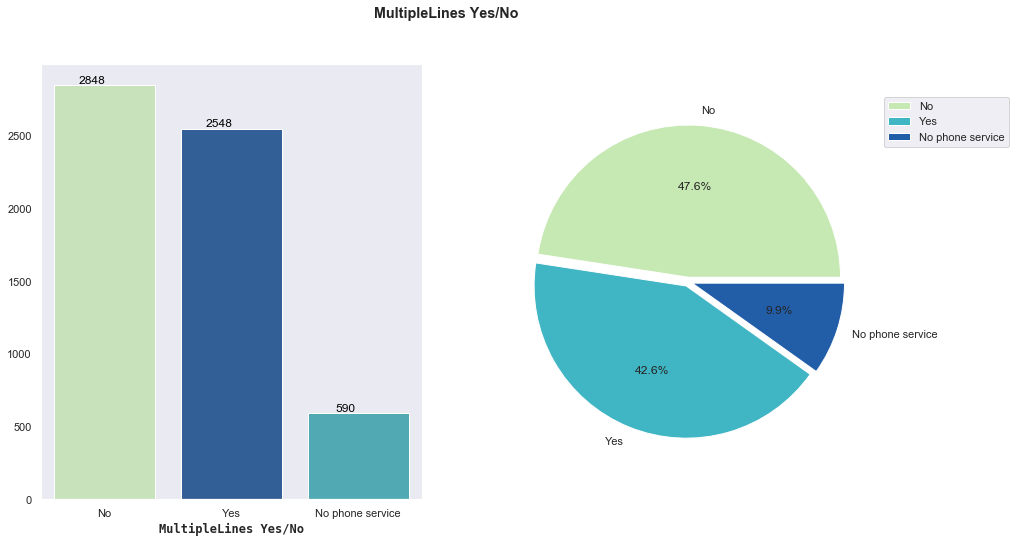

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['MultipleLines'].value_counts().index
y=df['MultipleLines'].value_counts().values.tolist()
data = df.groupby("MultipleLines").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('MultipleLines Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['MultipleLines'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('MultipleLines Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are not having Multiplelines
>#### 48.1% (3390) of the customers are not having Multiplelines
>#### 42.2% (2971) of the customers are having Multiplelines
>#### 9.7% (682) of the customers are not having any phone service

In [29]:
df['InternetService'].value_counts()

Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64

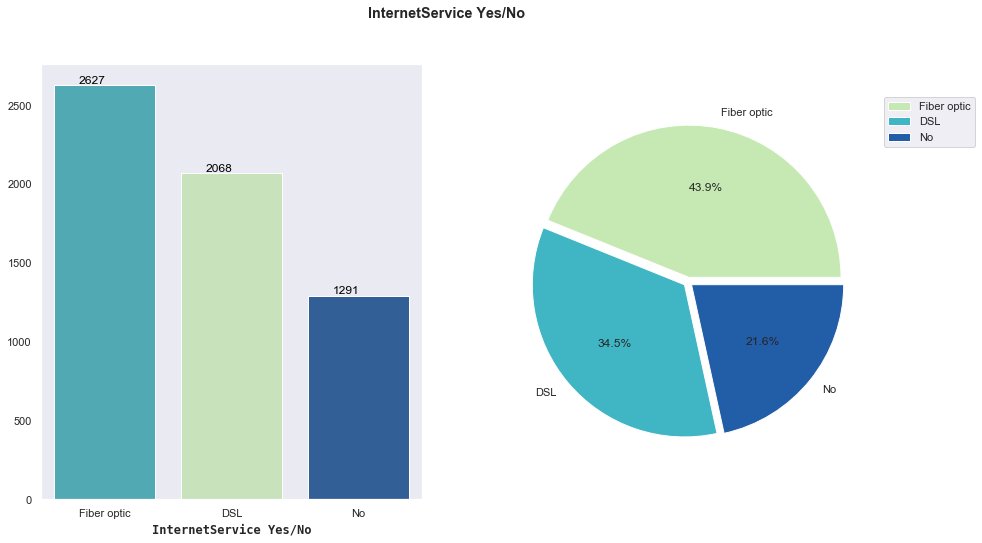

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['InternetService'].value_counts().index
y=df['InternetService'].value_counts().values.tolist()
data = df.groupby("InternetService").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('InternetService Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['InternetService'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('InternetService Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are not having Fiber Optic InternetService
>#### 44% (3096) of the customers are having Fiber optic InternetService
>#### 34.4% (2421) of the customers are having DSL InternetService
>#### 21.7% (1526) of the customers are not having any InternetService service

In [31]:
df['OnlineSecurity'].value_counts()

No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64

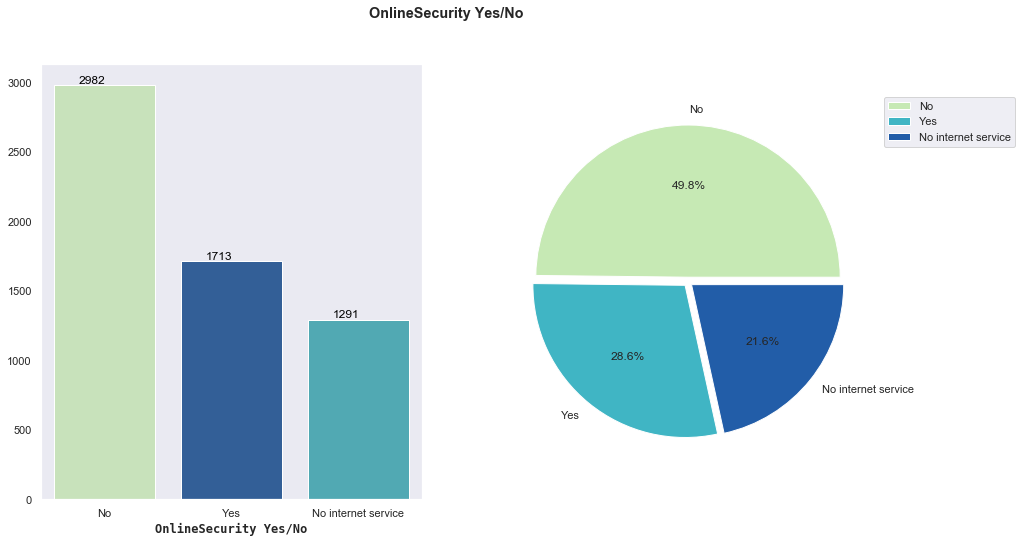

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['OnlineSecurity'].value_counts().index
y=df['OnlineSecurity'].value_counts().values.tolist()
data = df.groupby("OnlineSecurity").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('OnlineSecurity Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['OnlineSecurity'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('OnlineSecurity Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are not having OnlineSecurity
>#### 49.7% (3498) of the customers are not having OnlineSecurity
>#### 28.7% (2019) of the customers are having OnlineSecurity
>#### 21.7% (1526) of the customers are not having any internet service

In [33]:
df['OnlineBackup'].value_counts()

No                     2605
Yes                    2090
No internet service    1291
Name: OnlineBackup, dtype: int64

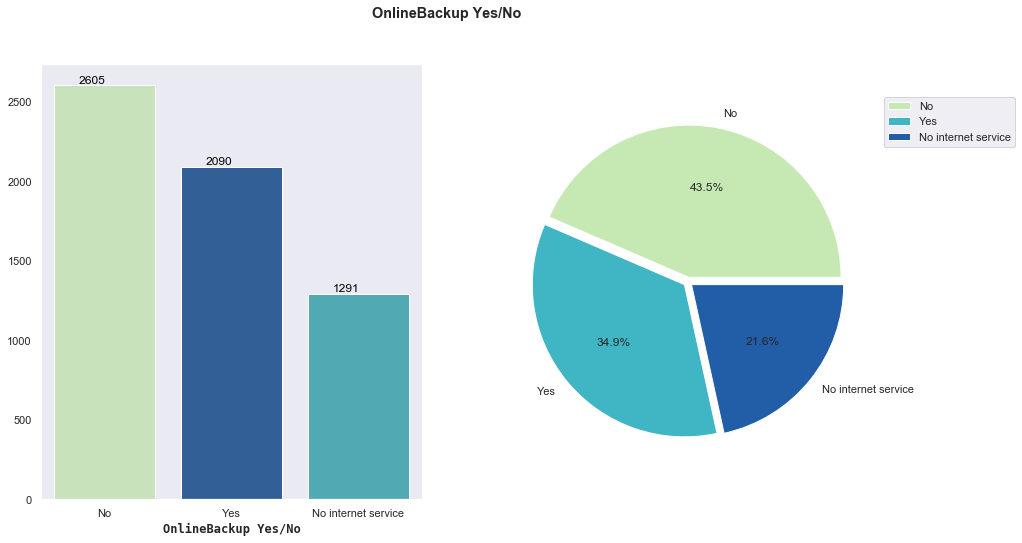

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['OnlineBackup'].value_counts().index
y=df['OnlineBackup'].value_counts().values.tolist()
data = df.groupby("OnlineBackup").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('OnlineBackup Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['OnlineBackup'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('OnlineBackup Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are not having OnlineBackup
>#### 43.8% (3498) of the customers are not having OnlineBackup
>#### 34.5% (2019) of the customers are having OnlineSecurity
>#### 21.7% (1526) of the customers are not having any internet service

In [35]:
df['DeviceProtection'].value_counts()

No                     2640
Yes                    2055
No internet service    1291
Name: DeviceProtection, dtype: int64

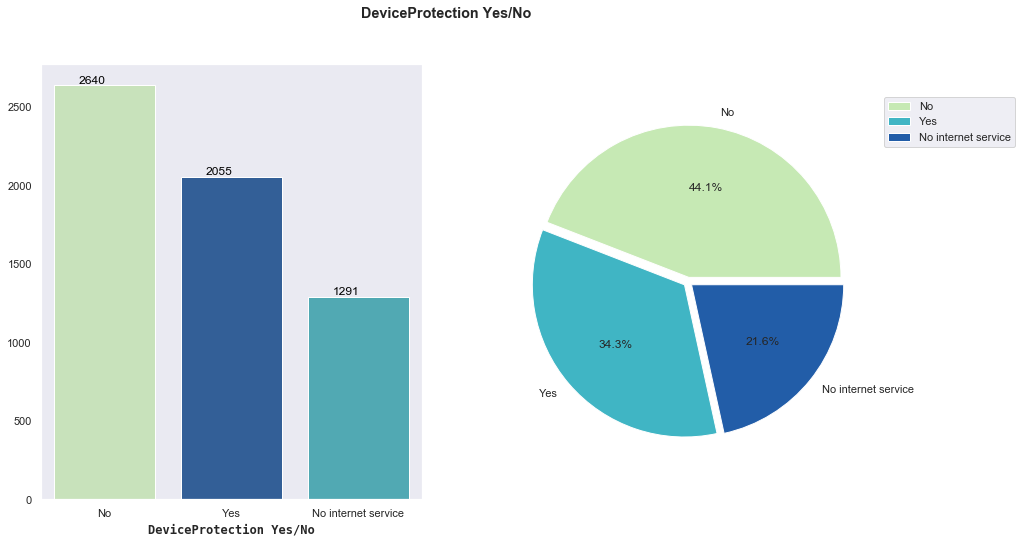

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['DeviceProtection'].value_counts().index
y=df['DeviceProtection'].value_counts().values.tolist()
data = df.groupby("DeviceProtection").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('DeviceProtection Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['DeviceProtection'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('DeviceProtection Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are not having DeviceProtection
>#### 43.9% (3095) of the customers are not having DeviceProtection
>#### 34.4% (2422) of the customers are having OnlineSecurity
>#### 21.7% (1526) of the customers are not having any internet service

In [37]:
df['TechSupport'].value_counts()

No                     2960
Yes                    1735
No internet service    1291
Name: TechSupport, dtype: int64

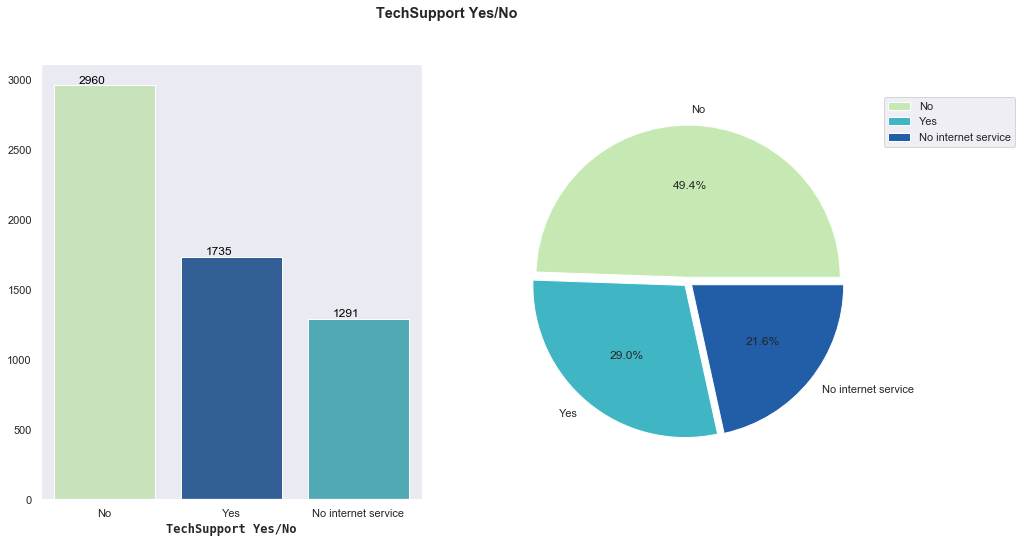

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['TechSupport'].value_counts().index
y=df['TechSupport'].value_counts().values.tolist()
data = df.groupby("TechSupport").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('TechSupport Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['TechSupport'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('TechSupport Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are not having TechSupport
>#### 49.3% (3473) of the customers are not having TechSupport
>#### 29.0% (2044) of the customers are having TechSupport
>#### 21.7% (1526) of the customers are not having any internet service

In [39]:
df['StreamingTV'].value_counts()

No                     2389
Yes                    2306
No internet service    1291
Name: StreamingTV, dtype: int64

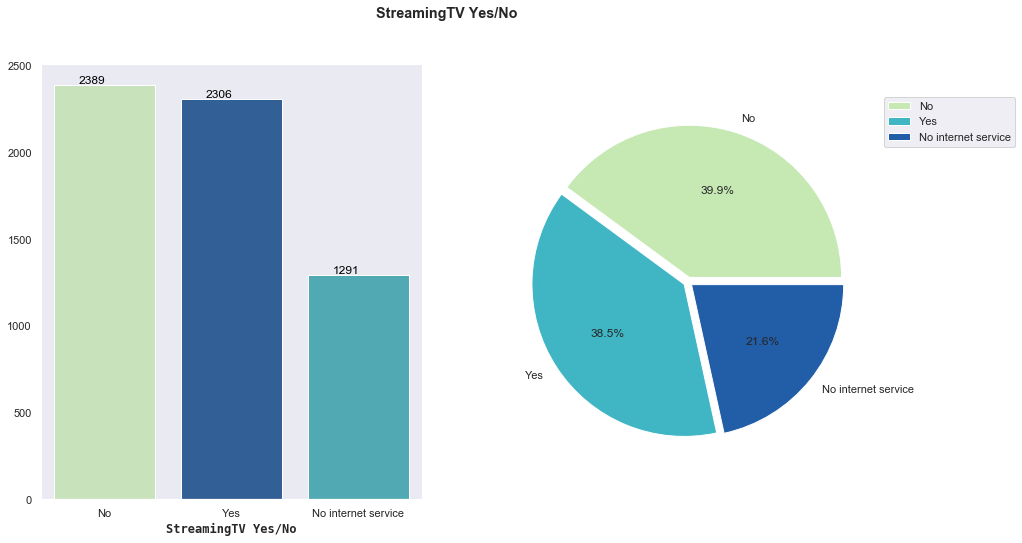

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['StreamingTV'].value_counts().index
y=df['StreamingTV'].value_counts().values.tolist()
data = df.groupby("StreamingTV").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('StreamingTV Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['StreamingTV'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('StreamingTV Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are not having StreamingTV
>#### 39.9% (2810) of the customers are not having StreamingTV
>#### 38.4% (2707) of the customers are having StreamingTV
>#### 21.7% (1526) of the customers are not having any internet service

In [41]:
df['StreamingMovies'].value_counts()

No                     2356
Yes                    2339
No internet service    1291
Name: StreamingMovies, dtype: int64

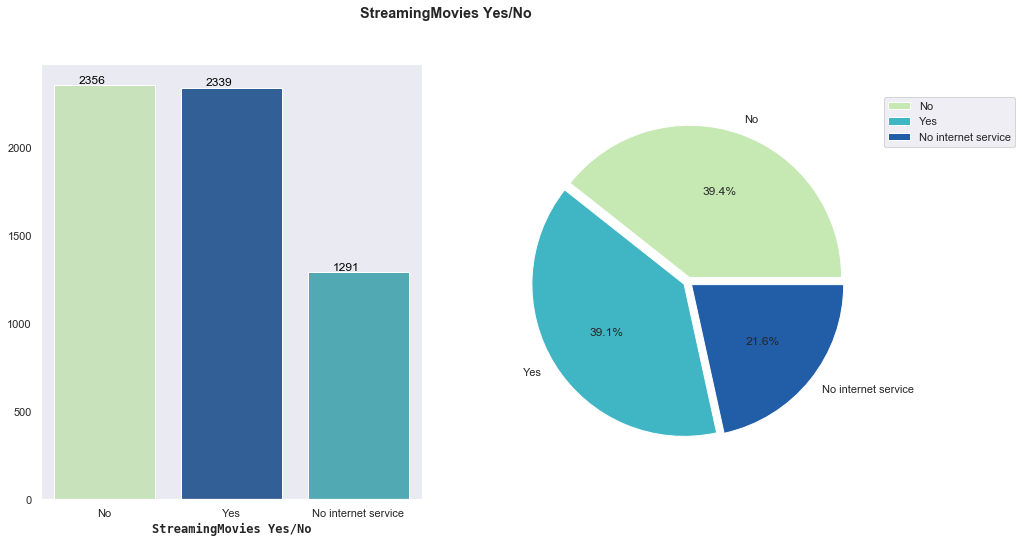

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['StreamingMovies'].value_counts().index
y=df['StreamingMovies'].value_counts().values.tolist()
data = df.groupby("StreamingMovies").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('StreamingMovies Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['StreamingMovies'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('StreamingMovies Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are not having StreamingMovies
>#### 39.5% (2785) of the customers are not having StreamingMovies
>#### 38.8% (2732) of the customers are having StreamingMovies
>#### 21.7% (1526) of the customers are not having any internet service

In [43]:
df['Contract'].value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

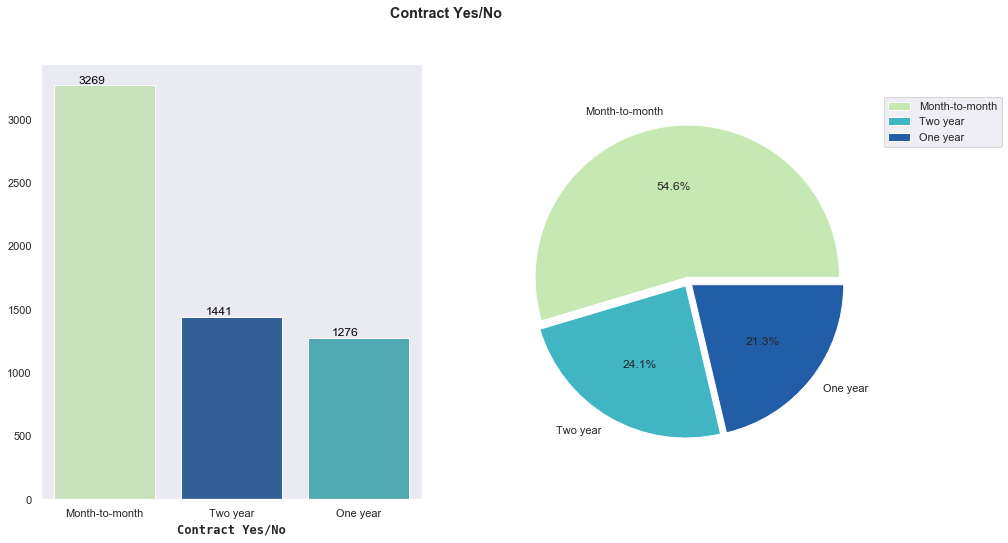

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Contract'].value_counts().index
y=df['Contract'].value_counts().values.tolist()
data = df.groupby("Contract").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Contract Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Contract'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Contract Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are having Month-to-Month Contract
>#### 55.0% (3875) of the customers are having Month-to-Month Contract
>#### 24.1% (1695) of the customers are having Two year Contract
>#### 20.9% (1473) of the customers are having One year Contract

In [45]:
df['PaperlessBilling'].value_counts()

Yes    3528
No     2458
Name: PaperlessBilling, dtype: int64

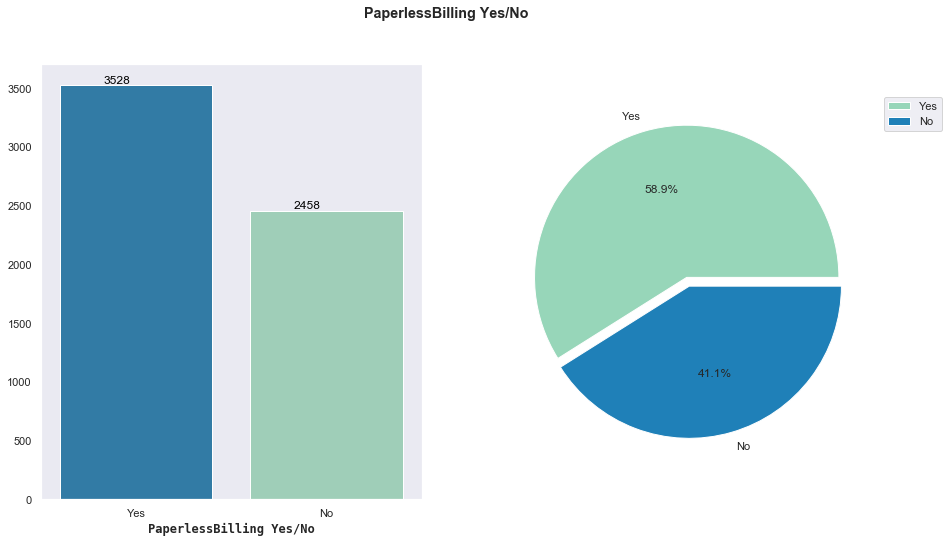

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['PaperlessBilling'].value_counts().index
y=df['PaperlessBilling'].value_counts().values.tolist()
data = df.groupby("PaperlessBilling").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('PaperlessBilling Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['PaperlessBilling'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('PaperlessBilling Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are having paperlessBilling
>#### 59.2% (4171) of the customers are having paperlessBilling
>#### 40.8% (2872) of the customers are not having paperlessBilling

In [47]:
df['PaymentMethod'].value_counts()

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64

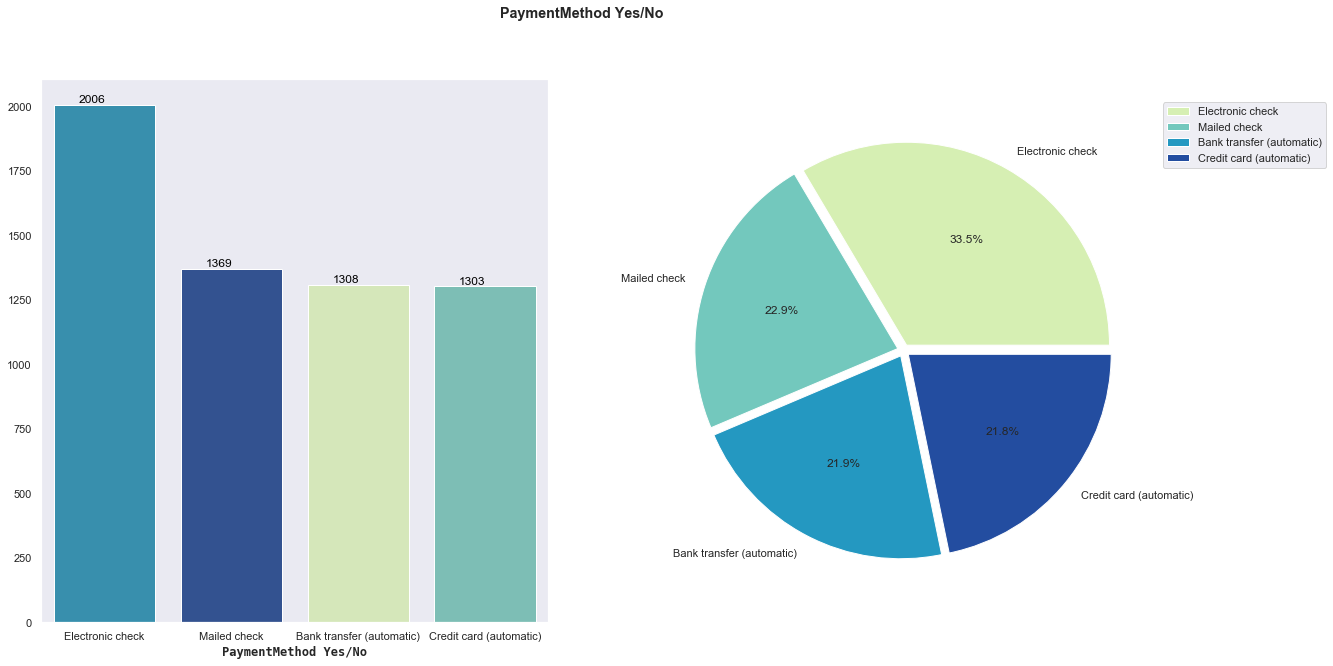

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['PaymentMethod'].value_counts().index
y=df['PaymentMethod'].value_counts().values.tolist()
data = df.groupby("PaymentMethod").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('PaymentMethod Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['PaymentMethod'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('PaymentMethod Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are having Electronic check PaymentMethod
>#### 33.6% (2365) of the customers are having Electronic check PaymentMethod
>#### 22.9% (1695) of the customers are having Mailed check PaymentMethod
>#### 21.9% (1544) of the customers are having Bank transfer(automatic) check PaymentMethod
>#### 21.6% (1522) of the customers are having Credit Card(automatic) check PaymentMethod

In [49]:
df['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

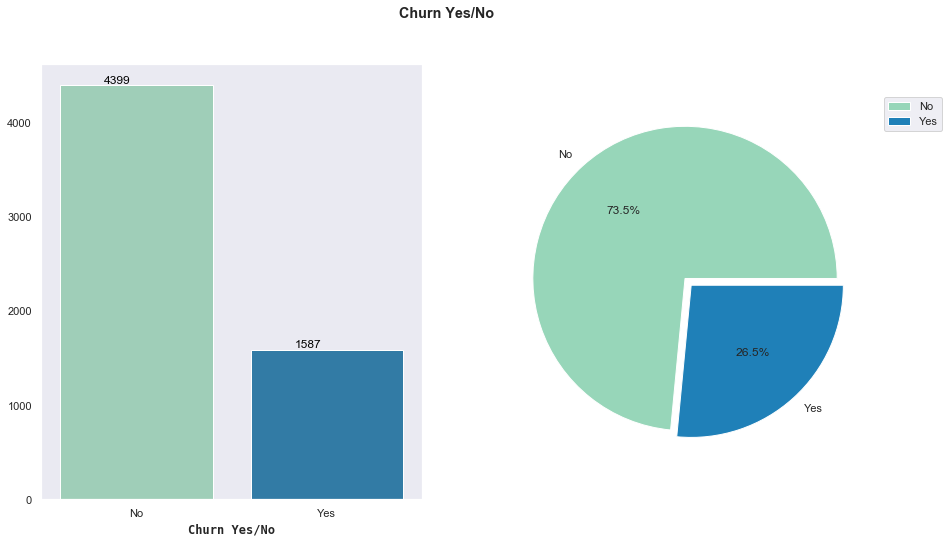

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Churn'].value_counts().index
y=df['Churn'].value_counts().values.tolist()
data = df.groupby("Churn").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Churn Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Churn'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Churn Yes/No',weight = 'bold')
plt.show()

>#### Most of the customers are not invloving Churn
>#### 73.5% (5174) of the customers are not invloving in Churn
>#### 26.5% (1869) of the customers are invloving in Churn
>#### This is also looks like unbalanced data

># Exploring Numerial Columns

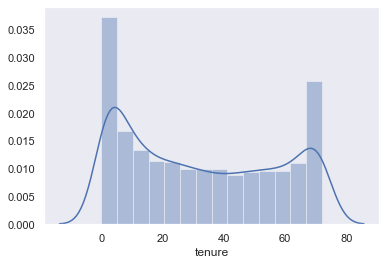

In [51]:
sns.distplot(a = df['tenure'],kde = True)
plt.show()

#### Most of the customers are staying only in between 0-5 months in the company

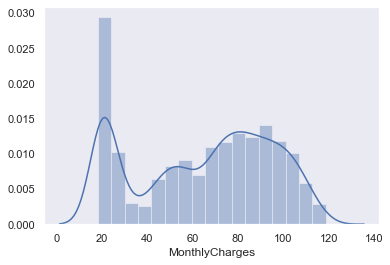

In [52]:
sns.distplot(a = df['MonthlyCharges'],kde = True)
plt.show()

#### Most of the customers having Monthly charges in between 20-25

>## Which gender is doing more churn

In [53]:
fig = px.histogram(data_frame = df,
             x = "gender",
             color="Churn", title="<b>Gender vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [54]:
fig = px.sunburst(data_frame=df,
                  path=['gender', 'Churn'],
                  color='Churn',
                  title='Gender vs Churn'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

>#### Only 1% of female churned morethan male if we talk in number only 9 female churned morethan male.
>#### 930 male churned while 939 femaale churned overall.

In [55]:
fig = px.sunburst(data_frame=df,
                  path=['SeniorCitizen', 'Churn'],
                  color='Churn',
                  title='SeniorCitizen vs Churn'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

>#### Intresting fact here is 42% of the old citizens are churned

In [56]:
fig = px.sunburst(data_frame=df,
                  path=['Partner', 'Churn'],
                  color='Churn',
                  title='Partner vs Churn'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

#### 33% of people without partners churned

In [57]:
fig = px.histogram(data_frame = df,
             x = "Dependents",
             color="Churn", title="<b>Dependents vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

#### Customers without dependent churned more

In [58]:
fig = px.sunburst(data_frame=df,
                  path=['Dependents', 'Churn'],
                  color='Churn',
                  title='Dependents vs Churn'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

In [59]:
fig = px.histogram(data_frame = df,
             x = "PhoneService",
             color="Churn", title="<b>PhoneService vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [60]:
fig = px.sunburst(data_frame=df,
                  path=['PhoneService', 'Churn'],
                  color='Churn',
                  title='PhoneService vs Churn'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

In [61]:
fig = px.histogram(data_frame = df,
             x = "MultipleLines",
             color="Churn", title="<b>MultipleLines vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [62]:
fig = px.histogram(data_frame = df,
             x = "InternetService",
             color="Churn", title="<b>InternetService vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [63]:
fig = px.histogram(data_frame = df,
             x = "OnlineSecurity",
             color="Churn", title="<b>OnlineSecurity vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [64]:
fig = px.histogram(data_frame = df,
             x = "OnlineBackup",
             color="Churn", title="<b>Onlinebackup vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [65]:
fig = px.histogram(data_frame = df,
             x = "DeviceProtection",
             color="Churn", title="<b>DeviceProtection vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [66]:
fig = px.histogram(data_frame = df,
             x = "TechSupport",
             color="Churn", title="<b>TechSupport vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [67]:
fig = px.histogram(data_frame = df,
             x = "StreamingTV",
             color="Churn", title="<b>StreamingTV vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [68]:
fig = px.histogram(data_frame = df,
             x = "StreamingMovies",
             color="Churn", title="<b>StreamingMovies vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [69]:
fig = px.histogram(data_frame = df,
             x = "Contract",
             color="Churn", title="<b>Contract vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [70]:
fig = px.histogram(data_frame = df,
             x = "PaperlessBilling",
             color="Churn", title="<b>PaperlessBilling vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

In [71]:
fig = px.histogram(data_frame = df,
             x = "PaymentMethod",
             color="Churn", title="<b>PaymentMethod vs Churn</b>",
             pattern_shape_sequence=['x'],
             template='ggplot2')

fig.show()

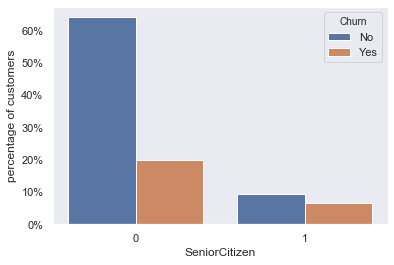

In [72]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

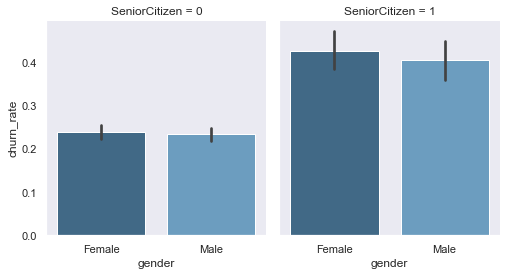

In [73]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

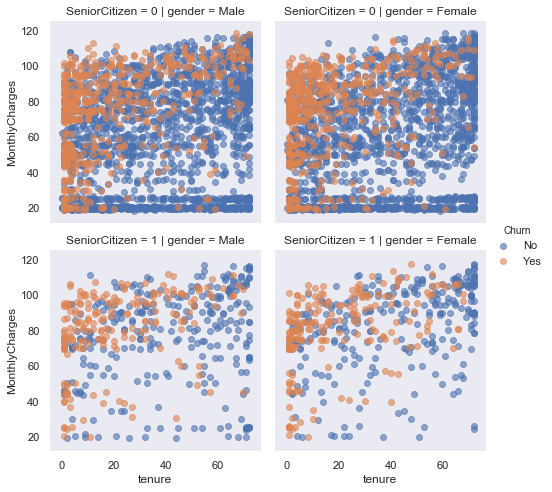

In [74]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

>#### Gender is not an indicative of churn.
>#### SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.
>#### There are no special relations between this categorical values and the main numerical features.

>## Partner and dependents

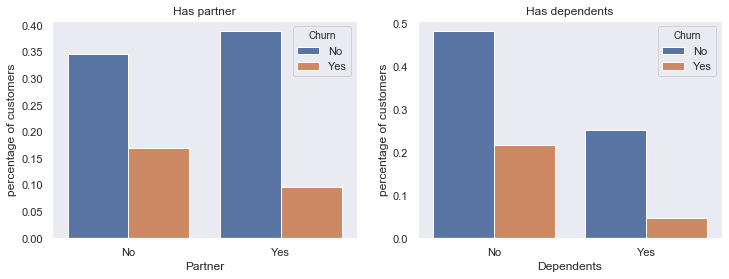

In [75]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

>#### Customers that doesn't have partners are more likely to churn
>#### Customers without dependents are also more likely to churn

>## Phone and Internet services

>#### Now let's look at the services that customers are using. There are only two main services: phone and internet but the former has many additionals like online backup and security.

#### Phone Services

#### There are only two features here: if the client has phone and if he has more than one line. Both can be summed up in one chart:

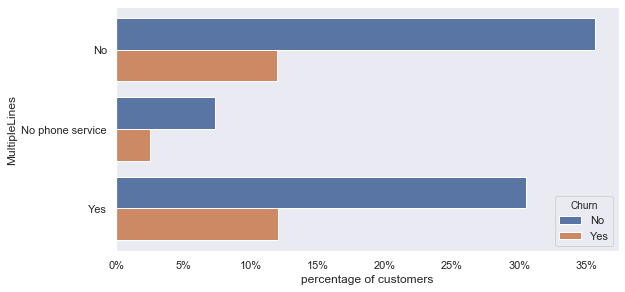

In [76]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

>#### Few customers doesn't have phone service
>#### Customers with multiple lines have a slightly higher churn rate
#### Let's see how multiple lines affects the monthly charges:

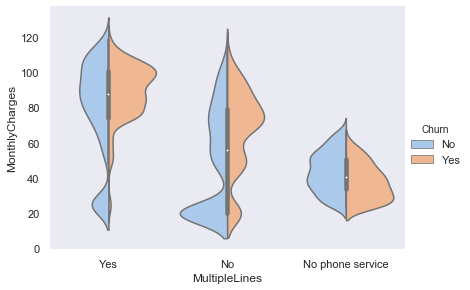

In [77]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

#### Internet services

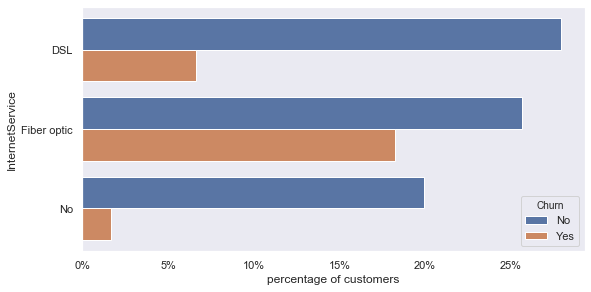

In [78]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

>#### Clients without internet have a very low churn rate
>#### Customers with fiber are more probable to churn than those with DSL connection
#### Comparing the Internet service with monthly charges:

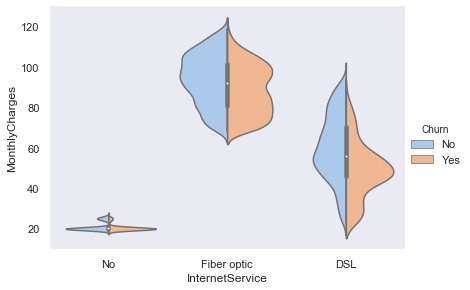

In [79]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

>#### It's interesting how customers with DSL (slower connection) and higher charges are less probable to churn.

#### Additional services

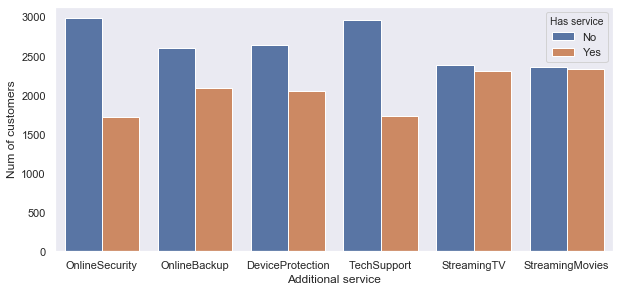

In [80]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

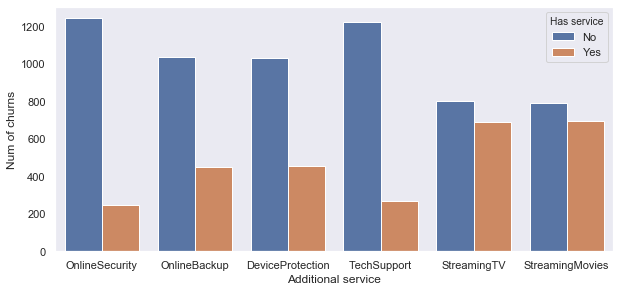

In [81]:
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

#### The first plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. We can see that:
>#### Customers with the first 4 additionals (security to tech support) are more unlikely to churn
>#### Streaming service is not predictive for churn

#### Contract and Payment

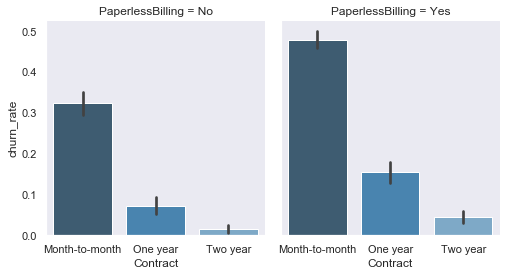

In [82]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

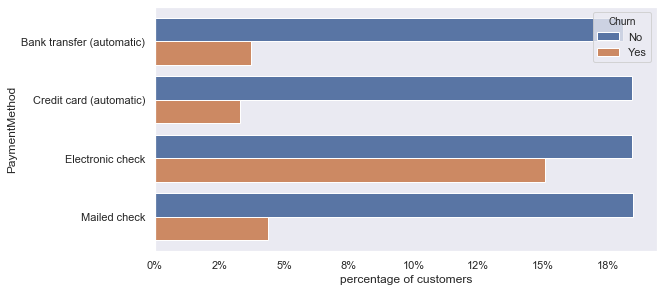

In [83]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

>#### Customers with paperless billing are more probable to churn
>#### The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
>#### Short term contracts have higher churn rates

In [84]:
train_no_NA = df.dropna()

train_cat_visual_0 = train_no_NA[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']].columns.tolist()

In [ ]:
sns.

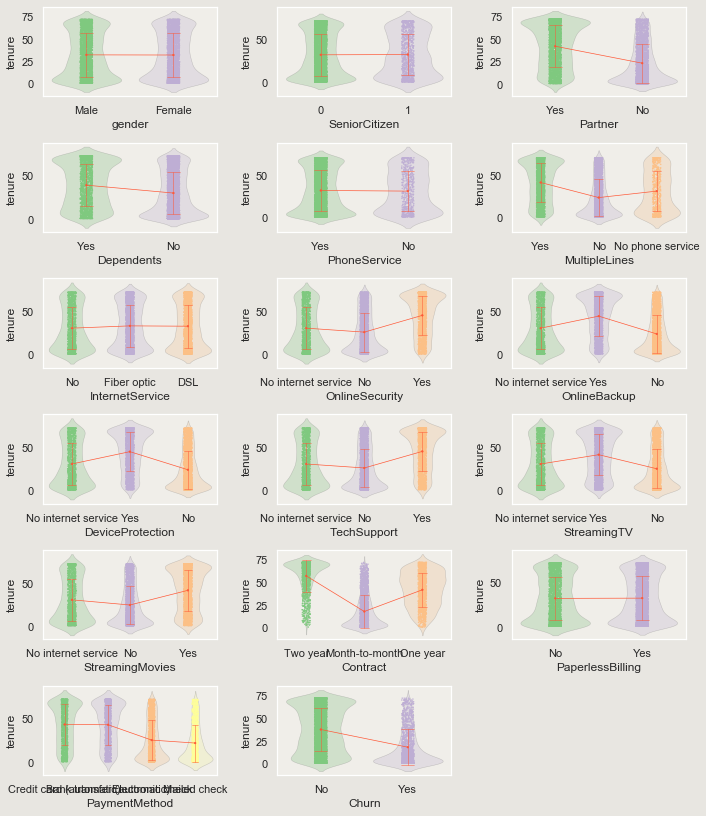

In [90]:
sns.set_style(rc = {'figure.dpi': 250, 'axes.labelsize': 7, 
                    'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#e8e6e1'})

fig, ax = plt.subplots(6, 3, figsize = (10, 11.5))

for indx, (column, axes) in list(enumerate(list(zip(train_cat_visual_0, ax.flatten())))):
    
    sns.violinplot(ax = axes, x = train_no_NA[column], 
                   y = train_no_NA['tenure'],
                   scale = 'width', linewidth = 0.5, 
                   palette = 'Accent', inner = None)
    
    plt.setp(axes.collections, alpha = 0.3)
    
    sns.stripplot(ax = axes, x = train_no_NA[column], 
                  y = train_no_NA['tenure'],
                  palette = 'Accent', alpha = 0.9, 
                  s = 1.5, jitter = 0.07)
    sns.pointplot(ax = axes, x = train_no_NA[column],
                  y = train_no_NA['tenure'],
                  color = '#ff5736', scale = 0.25,
                  estimator = np.mean, ci = 'sd',
                  errwidth = 0.5, capsize = 0.15, join = True)
    
    plt.setp(axes.lines, zorder = 100)
    plt.setp(axes.collections, zorder = 100)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()

In [91]:
train_cat_visual_1 = df.select_dtypes(
                     include = ['object', 'category']).columns.tolist()
train_cat_visual_1.remove('customerID')

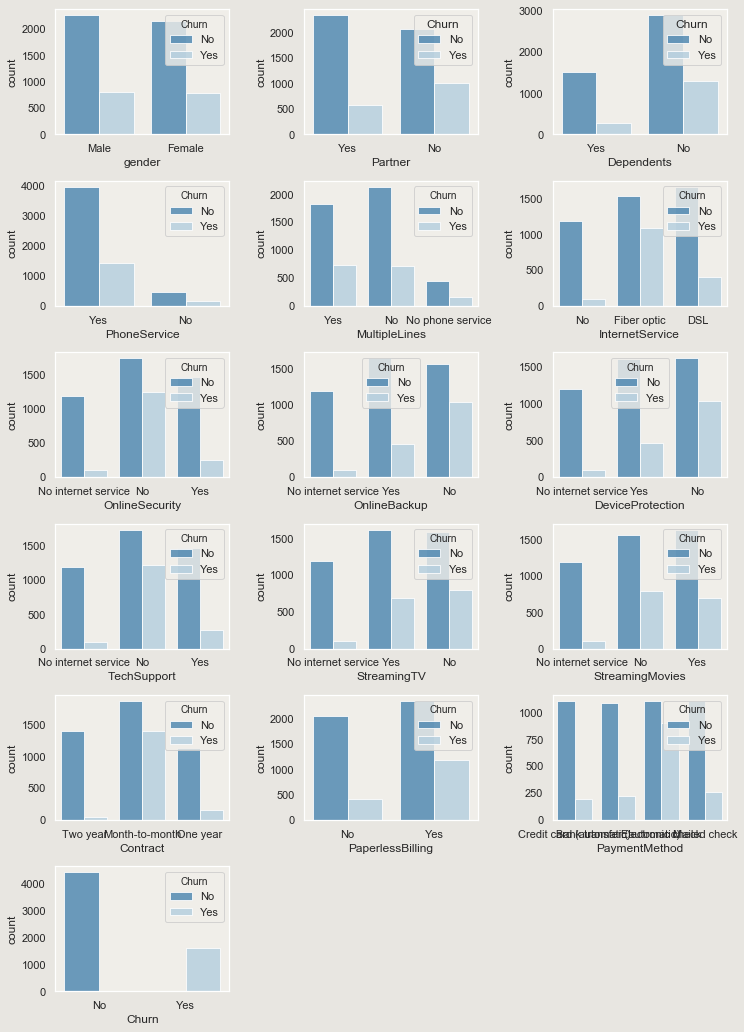

In [96]:
sns.set_style(rc = {'figure.dpi': 250, 'axes.labelsize': 7, 
                    'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#e8e6e1'})

fig, ax = plt.subplots(6, 3, figsize = (10.5, 14.5))

for indx, (column, axes) in list(enumerate(list(zip(train_cat_visual_1, 
                                                    ax.flatten())))):
    
    sns.countplot(ax = axes, x = df[column], hue = df['Churn'], 
                  palette = 'Blues_r', alpha = 0.8)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
axes_legend = ax.flatten()

axes_legend[1].legend(title = 'Churn', loc = 'upper right')
axes_legend[2].legend(title = 'Churn', loc = 'upper right')

plt.tight_layout()
plt.show()

In [97]:
train_num_visual_0 = ['MonthlyCharges', 'tenure','TotalCharges']

AttributeError: module 'seaborn' has no attribute 'histplot'

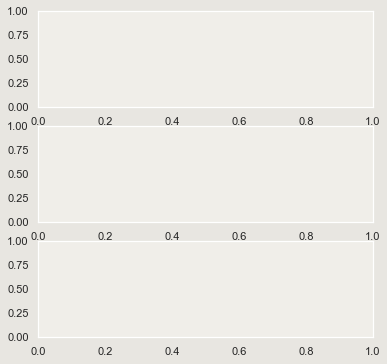

In [110]:
sns.set_style(rc = {'figure.dpi': 120, 'axes.labelsize': 8, 
                    'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#e8e6e1'})

fig, ax = plt.subplots(3, 1, figsize = (6, 6))

for indx, (column, axes) in list(enumerate(list(zip(train_num_visual_0, ax.flatten())))):
    
    sns.histplot(kind = 'hist',ax = axes, a = df[column], hue_order = df['Churn'], 
                 palette = 'Blues_r', alpha = 0.8, multiple = 'stack')
    
    legend = axes.get_legend() # sns.hisplot has some issues with legend
    handles = legend.legendHandles
    legend.remove()
    axes.legend(handles, ['0', '1'], title = 'Churn', loc = 'upper right')
    Quantiles = np.quantile(df[column], [0, 0.25, 0.50, 0.75, 1])
    
    for q in Quantiles: axes.axvline(x = q, linewidth = 0.5, color = 'r')
        
plt.tight_layout()
plt.show()

># Multi Table Analysis

In [ ]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [ ]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','TotalCharges', 'Churn'}}
multi_table([df_nunique['gender'], df_nunique['SeniorCitizen'], df_nunique['Partner'],df_nunique['Dependents'],
              df_nunique['PhoneService'],df_nunique['MultipleLines'],df_nunique['InternetService'] ,
             df_nunique['OnlineSecurity'], df_nunique['OnlineBackup'],df_nunique['DeviceProtection'],
            df_nunique['TechSupport'],df_nunique['StreamingTV'],df_nunique['StreamingMovies'],df_nunique['Contract'],
            df_nunique['PaperlessBilling'],df_nunique['Churn']])

In [ ]:
df_groupby = {var: pd.DataFrame(df.groupby([var, 'Churn']).size()) 
              for var in {'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'}}
multi_table([df_groupby['gender'], df_groupby['SeniorCitizen'], df_groupby['Partner'],df_groupby['Dependents'],
              df_groupby['PhoneService'],df_groupby['MultipleLines'],df_groupby['InternetService'] ,
             df_groupby['OnlineSecurity'], df_groupby['OnlineBackup'],df_groupby['DeviceProtection'],
            df_groupby['TechSupport'],df_groupby['StreamingTV'],df_groupby['StreamingMovies'],df_groupby['Contract'],
            df_groupby['PaperlessBilling']])

># Outliers Analysis with IQR Method

In [ ]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

># Data Cleaning

In [ ]:
df.drop(['customerID','Churn'],axis = 1,inplace = True)

In [ ]:
df

#### Dropped customerId because it is not needed
#### Dropped Churn because we had already encoded column Churn_rate

># On-Hot Encoding

In [ ]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)
df1

># Rearranging Columns

In [ ]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','churn_rate']]

In [ ]:
df1

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

># Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
scaler.fit(df1.drop(['churn_rate'],axis = 1))
scaled_features = scaler.transform(df1.drop('churn_rate',axis = 1))

># Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['churn_rate']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

># Prediction using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

In [ ]:
pred = knn.predict(X_test)
pred

In [ ]:
print(confusion_matrix(Y_test,pred))

In [ ]:
print(classification_report(Y_test,pred))

In [ ]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
print(metrics.accuracy_score(Y_test, pred))
knn.score(X_train,Y_train)

># Prediction using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

In [ ]:
predR = logmodel.predict(X_test)

In [ ]:
print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test,pred))

In [ ]:
logmodel.score(X_test,Y_test)

># Prediction using Decisiontree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)

In [ ]:
confusion_matrix(Y_test, y_pred)

In [ ]:
print(classification_report(Y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

># Prediction using support vector classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)

In [ ]:
confusion_matrix(Y_test, y_pred)

In [ ]:
print(classification_report(Y_test, y_pred))

In [ ]:
print(accuracy_score(Y_test, y_pred))

># Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

In [ ]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, y_pred))

In [ ]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

># Boosting: ADA boost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(X_train, Y_train)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME.R', learning_rate = 0.001, n_estimators = 200)
ada.fit(X_train, Y_train)

In [ ]:
confusion_matrix(Y_test, y_pred)

In [ ]:
print(accuracy_score(Y_test, y_pred))

># Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

In [ ]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 180)
gb.fit(X_train,Y_train)
y_pred = gb.predict(X_test) 

In [ ]:
print(accuracy_score(Y_test, y_pred))

># Stochastic Gradient Boosting (SGB)

In [ ]:
sgbc = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, max_features = 0.75, loss = 'deviance',
                                  n_estimators = 100)
sgbc.fit(X_train, Y_train)
y_pred = sgbc.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, y_pred))

># Cat boost Classifier

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations = 180, learning_rate = 0.1)
cat.fit(X_train, Y_train)
y_pred = cat.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, y_pred))

># XGB Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, n_estimators = 10)
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, y_pred))